<a href="https://colab.research.google.com/github/toriqultonu/Learning_PyTorch/blob/main/kohonen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

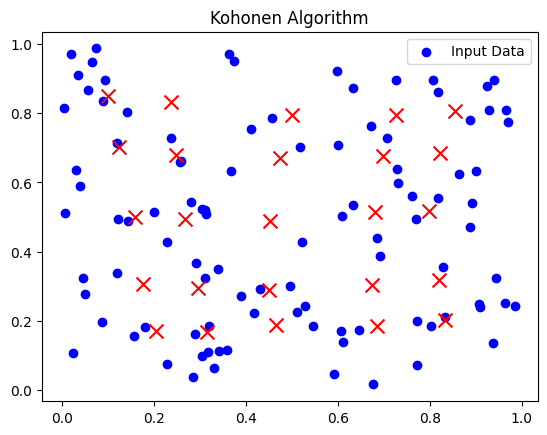

[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]
 [0.05808361 0.86617615]
 [0.60111501 0.70807258]
 [0.02058449 0.96990985]
 [0.83244264 0.21233911]
 [0.18182497 0.18340451]
 [0.30424224 0.52475643]
 [0.43194502 0.29122914]
 [0.61185289 0.13949386]
 [0.29214465 0.36636184]
 [0.45606998 0.78517596]
 [0.19967378 0.51423444]
 [0.59241457 0.04645041]
 [0.60754485 0.17052412]
 [0.06505159 0.94888554]
 [0.96563203 0.80839735]
 [0.30461377 0.09767211]
 [0.68423303 0.44015249]
 [0.12203823 0.49517691]
 [0.03438852 0.9093204 ]
 [0.25877998 0.66252228]
 [0.31171108 0.52006802]
 [0.54671028 0.18485446]
 [0.96958463 0.77513282]
 [0.93949894 0.89482735]
 [0.59789998 0.92187424]
 [0.0884925  0.19598286]
 [0.04522729 0.32533033]
 [0.38867729 0.27134903]
 [0.82873751 0.35675333]
 [0.28093451 0.54269608]
 [0.14092422 0.80219698]
 [0.07455064 0.98688694]
 [0.77224477 0.19871568]
 [0.00552212 0.81546143]
 [0.70685734 0.72900717]
 [0.77127035 0.07404465]
 [0.35846573 0.11586906]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class KohonenNetwork:
    def __init__(self, input_size, map_size):
        self.input_size = input_size
        self.map_size = map_size
        self.weights = np.random.rand(map_size[0], map_size[1], input_size)

    def find_winner(self, input_vector):

        distances = np.linalg.norm(self.weights - input_vector, axis=2)

        winner_index = np.unravel_index(distances.argmin(), distances.shape)
        return winner_index

    def update_weights(self, input_vector, winner_index, learning_rate, neighborhood_size):
        for i in range(self.map_size[0]):
            for j in range(self.map_size[1]):
                distance = np.linalg.norm(np.array([i, j]) - np.array(winner_index))
                influence = np.exp(-(distance**2) / (2 * (neighborhood_size**2)))
                self.weights[i, j, :] += learning_rate * influence * (input_vector - self.weights[i, j, :])

    def train(self, data, epochs, initial_learning_rate, initial_neighborhood_size):
        for epoch in range(epochs):
            learning_rate = initial_learning_rate * np.exp(-epoch / epochs)
            neighborhood_size = initial_neighborhood_size * np.exp(-epoch / epochs)

            for input_vector in data:
                winner_index = self.find_winner(input_vector)
                self.update_weights(input_vector, winner_index, learning_rate, neighborhood_size)

    def visualize(self, data):
        plt.scatter(data[:, 0], data[:, 1], c='b', marker='o', label='Input Data')
        for i in range(self.map_size[0]):
            for j in range(self.map_size[1]):
                plt.scatter(self.weights[i, j, 0], self.weights[i, j, 1], c='r', marker='x', s=100)
        plt.title('Kohonen Algorithm')
        plt.legend()
        plt.show()

if __name__ == "__main__":

    np.random.seed(42)
    data = np.random.rand(100, 2)

    input_size = 2
    map_size = (5, 5)
    kohonen_net = KohonenNetwork(input_size, map_size)
    kohonen_net.train(data, epochs=100, initial_learning_rate=0.1, initial_neighborhood_size=2.0)

    kohonen_net.visualize(data)
    print(data)

In [12]:
import math


class SOM:

    def winner(self, weights, sample):

        D0 = 0
        D1 = 0

        for i in range(len(sample)):

            D0 = D0 + math.pow((sample[i] - weights[0][i]), 2)
            D1 = D1 + math.pow((sample[i] - weights[1][i]), 2)

        if D0 < D1:
            return 0
        else:
            return 1

    def update(self, weights, sample, J, alpha):

        for i in range(len(weights[0])):
            weights[J][i] = weights[J][i] + alpha * (sample[i] - weights[J][i])

        return weights

def main():


    T = [[1, 1, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 1, 1]]

    m, n = len(T), len(T[0])

    weights = [[0.2, 0.6, 0.5, 0.9], [0.8, 0.4, 0.7, 0.3]]

    ob = SOM()

    epochs = 3
    alpha = 0.5

    for i in range(epochs):
        for j in range(m):

            sample = T[j]

            J = ob.winner(weights, sample)

            weights = ob.update(weights, sample, J, alpha)
    # testing
    s = [0, 0, 0, 0]
    J = ob.winner(weights, s)

    print("Test Sample s belongs to Cluster : ", J)
    print("Trained weights : ", weights)


if __name__ == "__main__":
    main()

Test Sample s belongs to Cluster :  1
Trained weights :  [[0.003125, 0.009375, 0.6640625, 0.9984375], [0.996875, 0.334375, 0.0109375, 0.0046875]]
